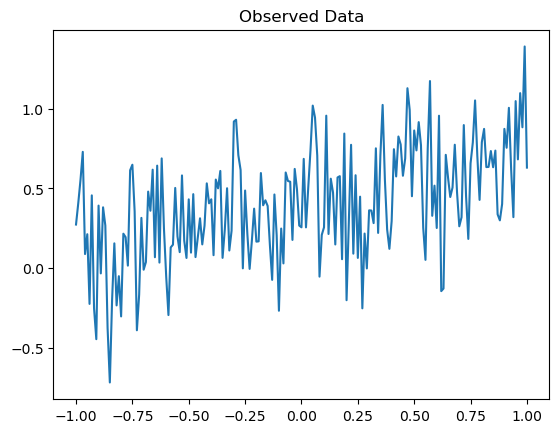

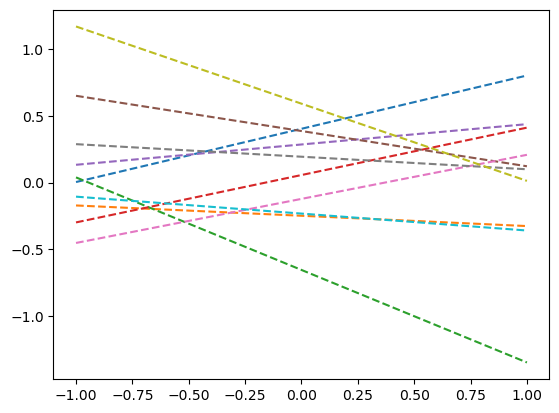

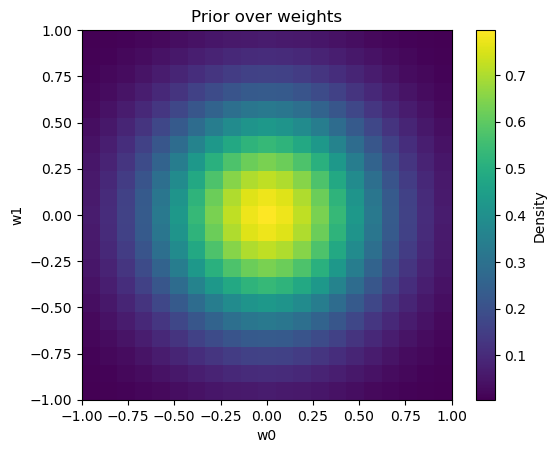

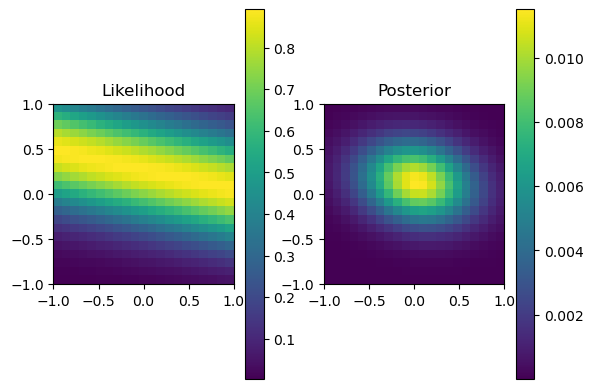

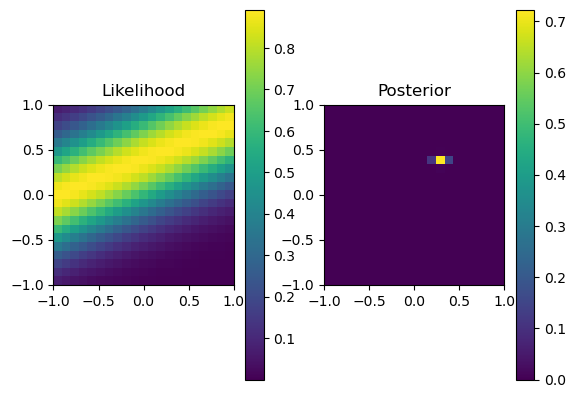

In [42]:
import numpy as np
import matplotlib.pyplot as plt
#np.random.seed(0)
def pickoutbest(posterior, wrange):
    idx = np.unravel_index(np.argmax(posterior), posterior.shape)
    return [wrange[idx[0]], wrange[idx[1]]]

# Data generation
x = np.arange(-1, 1.01, 0.01)#Input Data Points
y = 0.3 * x + 0.4 #Expected output relationship with input
t = y + np.random.randn(len(x)) * np.sqrt(0.1) #Noisy observed output, that is generated by modelling a gaussian noise over expected output

# Plotting of observed noisy data
plt.figure(1)
plt.plot(x, t, label="Noisy target")
plt.title("Observed Data")
plt.savefig("figure 1_BayesianLin.png")

plt.figure(2)
# Linear regression model y = w0 + w1 * x
# Sample from prior N(0, 0.2 * I)
for i in range(10):
    w = np.random.randn(2) * np.sqrt(0.2)
    y_pred = w[0] + w[1] * x
    plt.plot(x, y_pred, '--')
#plt.legend()
plt.savefig("figure 2_BayesianLin.png")

# Defining prior density function with gaussian uncertainty
wrange = np.arange(-1, 1.1, 0.1)
prior = np.zeros((len(wrange), len(wrange)))

for u in range(len(wrange)):
    for v in range(len(wrange)):
        prior[u, v] = (1 / (2 * np.pi * 0.2)) * np.exp(-(wrange[u]**2 + wrange[v]**2) / (2 * 0.2))
# Showing prior as heatmap
plt.figure(3)
plt.title("Prior over weights")
plt.imshow(prior, origin='lower', extent=[-1, 1, -1, 1])
plt.colorbar(label='Density')
plt.xlabel("w0")
plt.ylabel("w1")
plt.savefig("figure 3_BayesianLin.png")

# Initialization of posterior function
posterior = prior.copy()
indices = np.random.permutation(len(x))

# Sequentially looping through observations and learning
for d in range(len(x)):
    likelihood = np.zeros_like(prior)
    for u in range(len(wrange)):
        for v in range(len(wrange)):
            y_hat = wrange[u] + wrange[v] * x[indices[d]]
            likelihood[u, v] = (1 / np.sqrt(2 * np.pi * 0.2)) * np.exp(-(t[indices[d]] - y_hat)**2 / (2 * 0.2))

    # Updation of posterior
    posterior *= likelihood
    posterior /= np.sum(posterior)  # Normalize

    # Picking the best weights(MAP estimate)
    wpred = pickoutbest(posterior, wrange)
    
    if (d == 0):
    
        # Create likelihood and posterior heatmaps
        fig4 = plt.figure(5)
        plt.subplot(1, 2, 1)
        plt.imshow(likelihood, origin='lower', extent=[-1, 1, -1, 1])
        plt.title("Likelihood")
        plt.colorbar()
    
        plt.subplot(1, 2, 2)
        plt.imshow(posterior, origin='lower', extent=[-1, 1, -1, 1])
        plt.title("Posterior")
        plt.colorbar()
    
        fig4.savefig("figure 4_BayesianLIN.png")
    elif (d==len(x)-1):

        # Create likelihood and posterior heatmaps
        fig5 = plt.figure(7)
        plt.subplot(1, 2, 1)
        plt.imshow(likelihood, origin='lower', extent=[-1, 1, -1, 1])
        plt.title("Likelihood")
        plt.colorbar()
    
        plt.subplot(1, 2, 2)
        plt.imshow(posterior, origin='lower', extent=[-1, 1, -1, 1])
        plt.title("Posterior")
        plt.colorbar()
    
        fig5.savefig("figure 5_BayesianLIN.png")
        #plt.close(fig7)  